# Plots the robot logs over time

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import numpy as np
%matplotlib widget

## Plot a motor controller

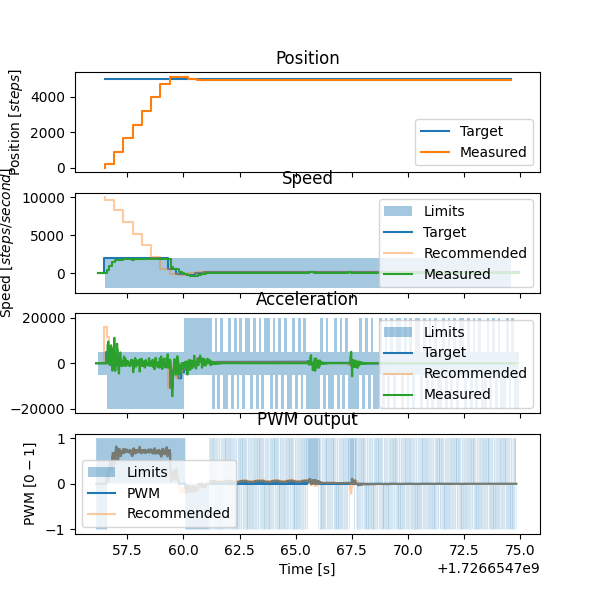

In [3]:
# Load data
log_dir = "test"
accel_df = pd.read_csv(f"{log_dir}/acceleration.csv")
speed_df = pd.read_csv(f"{log_dir}/speed.csv")
pos_df = pd.read_csv(f"{log_dir}/position.csv")


plt.close()
fig = plt.figure(figsize=[6,6])
# gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])
# (ax_speed, ax_accel_windup), (ax_accel, ax_speed_windup), (ax_pwm, ax_pwm_windup) = gs.subplots(sharex=True)
gs = fig.add_gridspec(4, height_ratios=[1, 1, 1, 1])
ax_position, ax_speed, ax_accel, ax_pwm = gs.subplots(sharex=True)

# Plot pwm
ax_pwm.fill_between(accel_df["Timestamp [s]"].values, accel_df["Limit Min"].values, accel_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Output"].values, label="PWM")
ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Last Windup"].values + accel_df["Output"].values, alpha=0.4, label="Recommended")
# ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Windup"].values, alpha=0.4, label="Windup")
ax_pwm.set_title("PWM output")
ax_pwm.set_ylabel("PWM [$0-1$]")
ax_pwm.set_xlabel("Time [s]")
ax_pwm.legend()
# ax_pwm.set_ylim((0,1))

# Plot acceleration
ax_accel.fill_between(speed_df["Timestamp [s]"].values, speed_df["Limit Min"].values, speed_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_accel.step(accel_df["Timestamp [s]"].values, accel_df["Target"].values, label="Target")
ax_accel.step(speed_df["Timestamp [s]"].values, speed_df["Last Windup"].values + speed_df["Output"].values, alpha=0.4, label="Recommended")
ax_accel.step(accel_df["Timestamp [s]"].values, accel_df["Current"].values, label="Measured")
ax_accel.set_title("Acceleration")
ax_accel.set_ylabel("Acceleration [$steps / second^2$]")
ax_accel.legend()

# Plot speed
ax_speed.fill_between(pos_df["Timestamp [s]"].values, pos_df["Limit Min"].values, pos_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_speed.step(speed_df["Timestamp [s]"].values, speed_df["Target"].values, label="Target")
ax_speed.step(pos_df["Timestamp [s]"].values, pos_df["Last Windup"].values + pos_df["Output"].values, alpha=0.4, label="Recommended")
ax_speed.step(speed_df["Timestamp [s]"].values, speed_df["Current"].values, label="Measured")
ax_speed.set_title("Speed")
ax_speed.set_ylabel("Speed [$steps / second$]")
ax_speed.legend()

# Plot position
ax_position.step(pos_df["Timestamp [s]"].values, pos_df["Target"].values, label="Target")
ax_position.step(pos_df["Timestamp [s]"].values, pos_df["Current"].values, label="Measured")
ax_position.set_title("Position")
ax_position.set_ylabel("Position [$steps$]")
ax_position.legend()

plt.show()

## Plot the robot position

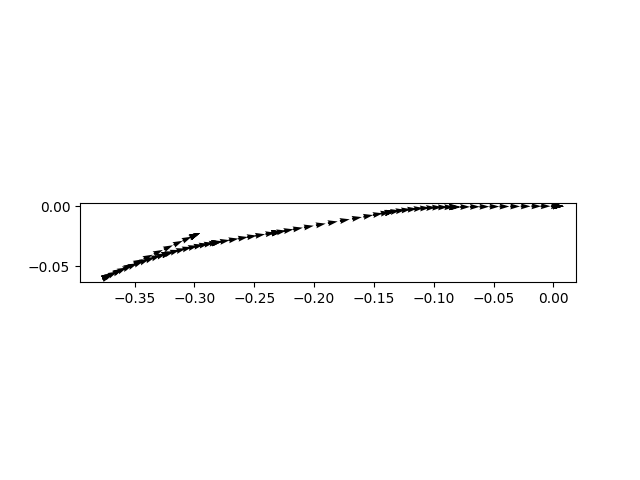

In [53]:
# Load data
log_file = "position.csv"
positions = pd.read_csv(log_file)
# positions = positions.iloc[::2, :] # Get every few rows

# Plot the positions
plt.close()
fig = plt.figure()
ax = fig.add_subplot()
plt.quiver(
    positions["X [m]"].values,
    positions["Y [m]"].values,
    abs(positions["Linear velocity [m/s]"].values),
    np.ones((1, len(positions))),
    angles=positions["Heading [rad]"].values * 180/np.pi,
    pivot='tail',
    scale=50
)
ax.set_aspect('equal', adjustable='box')
plt.show()

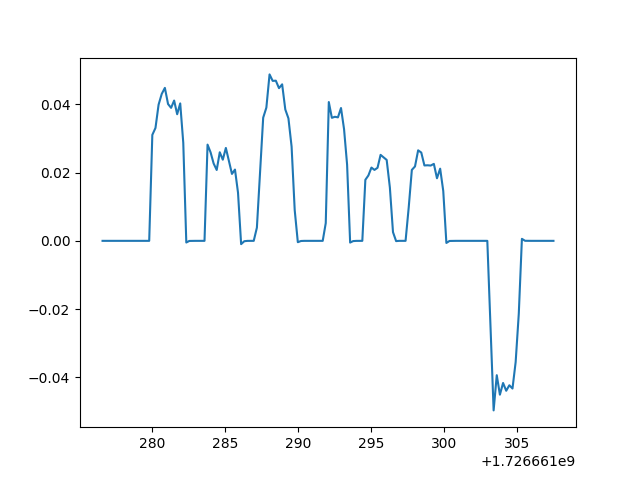

In [54]:
plt.close()
plt.figure()
plt.plot(
    positions["Timestamp [s]"].values,
    positions["Linear velocity [m/s]"].values
)
plt.show()

In [40]:
positions

,Timestamp [s],Forwards change [m],Sideways change [m],Heading change [rad],X [m],Y [m],Heading [rad],Angular velocity [rad/s],Rotation centre [m],Linear velocity [m/s]
0,1.726661e+09,0.000000e+00,0.0,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,inf,0.000000e+00
5,1.726661e+09,0.000000e+00,0.0,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,inf,0.000000e+00
10,1.726661e+09,0.000000e+00,0.0,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,inf,0.000000e+00
15,1.726661e+09,0.000000e+00,0.0,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,inf,0.000000e+00
20,1.726661e+09,0.000000e+00,0.0,-0.000000e+00,0.000000,0.000000,0.000000,-0.000000e+00,inf,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
660,1.726661e+09,1.093894e-14,0.0,6.424244e-15,0.215943,-0.017185,-0.146129,2.952676e-13,1.702759,-5.027694e-13
665,1.726661e+09,3.840038e-15,0.0,1.007760e-15,0.215943,-0.017185,-0.146129,4.452318e-14,3.810468,-1.696542e-13
670,1.726661e+09,1.169550e-15,0.0,-4.397646e-17,0.215943,-0.017185,-0.146129,-2.075861e-15,-26.594919,-5.520736e-14
675,1.726661e+09,3.870645e-16,0.0,-1.297136e-16,0.215943,-0.017185,-0.146129,-5.814950e-15,-2.983993,-1.735177e-14
